In [69]:
# ref. https://geohackweek.github.io/vector/06-geopandas-advanced/
%matplotlib inline

from __future__ import (absolute_import, division, print_function)
import os
import json
import psycopg2

import matplotlib as mpl
import matplotlib.pyplot as plt
# The two statemens below are used mainly to set up a plotting
# default style that's better than the default from Matplotlib 1.x
# Matplotlib 2.0 supposedly has better default styles.
import seaborn as sns
plt.style.use('bmh')

from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

In [22]:
db_conn_dict = {
    "host":"localhost",
    "port":5432,
    "dbname":"postgres",
    "user":"postgres",
    "password":"postgres"
}

In [90]:
with psycopg2.connect(**db_conn_dict) as conn:
    japan_ks = gpd.read_postgis(
        "SELECT * FROM japan_ks", 
        conn,
        geom_col='geom',
        crs={'init': u'epsg:4326'}, 
        coerce_float=False
    )

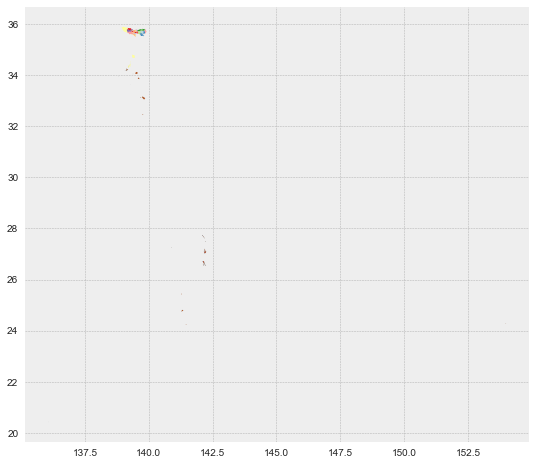

In [71]:
japan_ks.plot(column='city_code', cmap='Paired', categorical=True, figsize=(14, 8));

(138.85, 140)

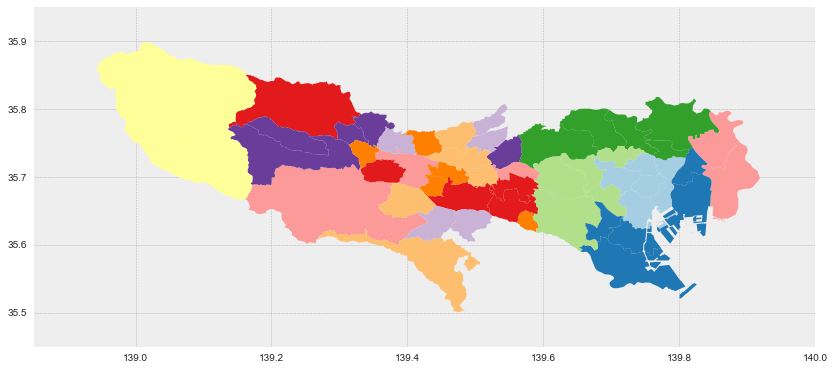

In [72]:
japan_ks.plot(column='city_code', cmap='Paired', categorical=True, figsize=(14, 8));
plt.ylim([35.45,35.95])
plt.xlim([138.85,140])

In [76]:
greenratio_query = """
select
  ratios.city_code as city_code
  , min(ratios.city_name) as city_name
  , sum(ratios.ratio) as green_ratio
from
  (select
    japan_alos.city_code
    , min(japan_alos.city_name) as city_name
    , min(alos_code_name.name) as alos_name
    , min(alos_code_name.code) as alos_code
    , sum(ST_Area(geography(japan_alos.geom))) / min(japan_ks.area) as ratio
  from
    japan_alos
    left join alos_code_name on (japan_alos.alos_code = alos_code_name.code)
    left join japan_ks on (japan_alos.city_code = japan_ks.city_code)
  where
    alos_code between 5 and 9
  group by
    japan_alos.city_code
    , japan_alos.alos_code
  order by
    japan_alos.city_code
  ) as ratios
group by
  ratios.city_code
order by
  green_ratio
;"""

In [88]:
with psycopg2.connect(**db_conn_dict) as conn:
  greenratio = pd.io.sql.read_sql(greenratio_query, conn)

In [100]:
greenratio

,city_code,city_name,green_ratio
0,13118,荒川区,0.003639
1,13114,中野区,0.016281
2,13102,中央区,0.016706
3,13116,豊島区,0.016745
4,13107,墨田区,0.026208
5,13123,江戸川区,0.026259
6,13106,台東区,0.031382
7,13110,目黒区,0.035337
8,13108,江東区,0.035720
9,13109,品川区,0.037009
